# Initialization of the Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from matplotlib.pyplot import figure
drive.mount("./drive", force_remount=True)
path_prefix = "./drive/My Drive/Colab Notebooks/CS210 Term Project"
from os.path import join
%matplotlib inline

Mounted at ./drive


In [2]:
file_path = './drive/My Drive/Colab Notebooks/CS210 Term Project/project-data.csv'

df = pd.read_csv(file_path)

df.head()


,Month,Entertainment,Online Shopping,Clothing,Groceries,Healthcare,Dining,Personal Service,Subscription Services,Education,Home Maintenance,Misc
0,2022 December,463.20,231.29,258.21,359.97,1482.84,647.00,NaN,NaN,NaN,NaN,NaN
1,2023 January,1568.20,1425.71,992.00,NaN,NaN,1800.00,250.0,153.39,NaN,NaN,NaN
2,2023 February,463.20,1902.64,2759.41,453.80,NaN,2210.57,NaN,153.39,44.99,NaN,NaN
3,2023 March,1815.62,738.59,1723.99,645.19,749.14,1030.00,340.0,1494.34,NaN,129.5,300.00
4,2023 April,2402.62,978.45,358.16,213.74,250.88,3337.92,NaN,745.23,NaN,NaN,551.91


# Analysis and Visualization of the Dataframe


Hypothesis: My spendings in total (without taking inflation into account) changes over the months depending on the intensity of my academic life and the situations in my private life but the top
3 categories that I have spent the most does not change over the months mostly (over 50%).

Finding Sums of All Months and Top 6 Months Which Have Spent the Most (In the Descending Order)

In [3]:
if 'Month_Total' not in df.columns:
    df['Month_Total'] = df.select_dtypes(include='number').sum(axis=1)

df.head()

top_6_months = df.sort_values(by='Month_Total', ascending=False).head(6)

top_6_months

,Month,Entertainment,Online Shopping,Clothing,Groceries,Healthcare,Dining,Personal Service,Subscription Services,Education,Home Maintenance,Misc,Month_Total
11,2023 November,1593.66,2927.87,NaN,NaN,529.80,2039.00,NaN,1930.30,NaN,NaN,NaN,9020.63
3,2023 March,1815.62,738.59,1723.99,645.19,749.14,1030.00,340.00,1494.34,NaN,129.5,300.00,8966.37
4,2023 April,2402.62,978.45,358.16,213.74,250.88,3337.92,NaN,745.23,NaN,NaN,551.91,8838.91
9,2023 September,391.66,670.19,NaN,1254.36,2600.25,1096.49,NaN,2213.18,NaN,NaN,354.00,8580.13
2,2023 February,463.20,1902.64,2759.41,453.80,NaN,2210.57,NaN,153.39,44.99,NaN,NaN,7988.00
8,2023 August,678.00,NaN,391.66,2398.34,NaN,1440.00,24.53,809.82,877.21,400.0,500.00,7519.56


Six months spent the most in the descending order are 2023 November, 2023 March, 2023 April, 2023 September, 2023 February, and 2023 August.

Scatter Plot of the Total Sum of the Spendings According to Months

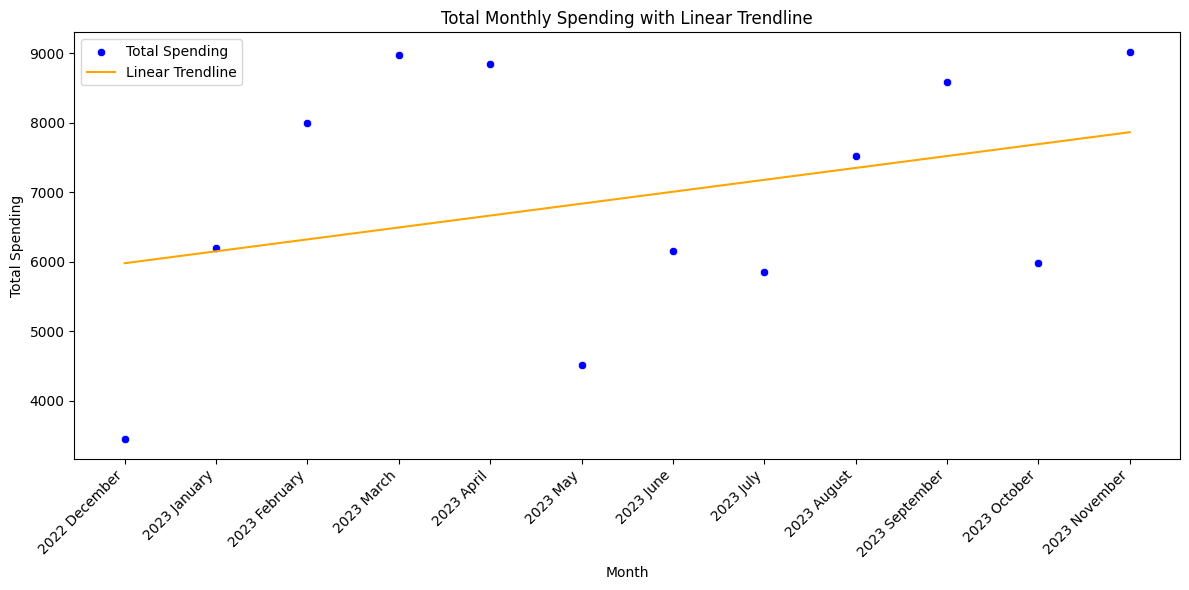

In [4]:
from scipy.stats import linregress

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Month', y='Month_Total', color='blue', label='Total Spending')

x = np.arange(len(df))
slope, intercept, _, _, _ = linregress(x, df['Month_Total'])
linear_trend = slope * x + intercept
plt.plot(x, linear_trend, color='orange', label='Linear Trendline')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.title('Total Monthly Spending with Linear Trendline')

plt.legend()

plt.tight_layout()
plt.show()


As can be understood from trendline, although there was a slight increase in the general average of spendings, they were dispersed over the months.

Finding Sums of All Categories and Top 3 Categories Which Have Spent the Most (In the Descending Order)

In [5]:
category_sums = df.drop(columns=['Month', 'Month_Total']).sum()

top_3_categories = category_sums.sort_values(ascending=False).head(3)

top_3_categories


Subscription Services    14744.43
Dining                   14515.45
Online Shopping          12348.25
dtype: float64

Histogram for Showing Sum of Spendings for Each Month

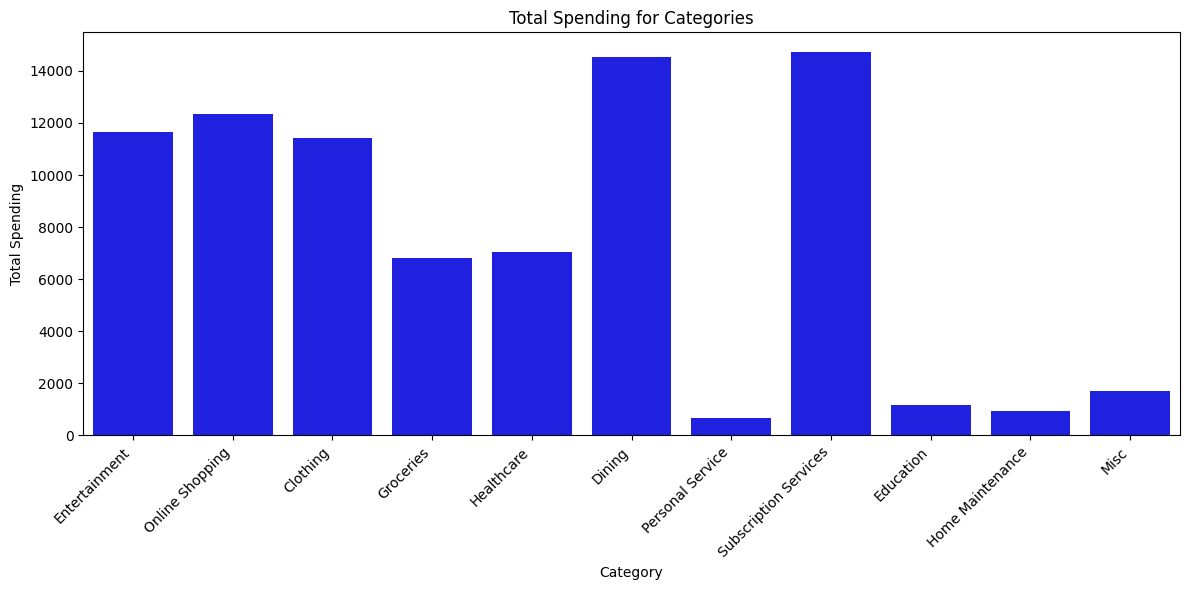

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_sums.index, y=category_sums.values, color='blue')
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Total Spending for Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Deciding Each Month's Most Spent 3 Categories

In [7]:
top_3_spent_categories = pd.DataFrame(columns=['Month', '1st', '2nd', '3rd'])

for month in df['Month'].unique():
    monthly_spending = df[df['Month'] == month].drop(['Month', 'Month_Total'], axis=1).sum()

    top_3_spent = monthly_spending.nlargest(3)

    category_dict = {
        'Month': month,
        '1st': top_3_spent.index[0],
        '2nd': top_3_spent.index[1],
        '3rd': top_3_spent.index[2]
    }

    new_row = pd.DataFrame([category_dict])
    top_3_spent_categories = pd.concat([top_3_spent_categories, new_row], ignore_index=True)

top_3_spent_categories


,Month,1st,2nd,3rd
0,2022 December,Healthcare,Dining,Entertainment
1,2023 January,Dining,Entertainment,Online Shopping
2,2023 February,Clothing,Dining,Online Shopping
3,2023 March,Entertainment,Clothing,Subscription Services
4,2023 April,Dining,Entertainment,Online Shopping
5,2023 May,Healthcare,Subscription Services,Online Shopping
6,2023 June,Entertainment,Clothing,Subscription Services
7,2023 July,Clothing,Subscription Services,Groceries
8,2023 August,Groceries,Dining,Education
9,2023 September,Healthcare,Subscription Services,Groceries


Deciding Each Months' Most Spent Categories with According Values

In [8]:
df = df.set_index('Month')

category_columns = df.columns.tolist()
category_columns.remove('Month_Total')

rows_list = []

for month, row in df.iterrows():
    top_3_categories = row[category_columns].dropna().sort_values(ascending=False).head(3).index.tolist()

    for category in top_3_categories:
        spending = row[category]
        rows_list.append({'Month': month, 'Category': category, 'Spending': spending})

top_spendings_df = pd.DataFrame(rows_list)

print(top_spendings_df)

             Month               Category  Spending
0    2022 December             Healthcare   1482.84
1    2022 December                 Dining    647.00
2    2022 December          Entertainment    463.20
3     2023 January                 Dining   1800.00
4     2023 January          Entertainment   1568.20
5     2023 January        Online Shopping   1425.71
6    2023 February               Clothing   2759.41
7    2023 February                 Dining   2210.57
8    2023 February        Online Shopping   1902.64
9       2023 March          Entertainment   1815.62
10      2023 March               Clothing   1723.99
11      2023 March  Subscription Services   1494.34
12      2023 April                 Dining   3337.92
13      2023 April          Entertainment   2402.62
14      2023 April        Online Shopping    978.45
15        2023 May             Healthcare   1450.00
16        2023 May  Subscription Services   1332.37
17        2023 May        Online Shopping    646.88
18       202

Counts of Each Category Occurings in the Top 3 Most Spent Categories According to Each Month

In [9]:
frequency_1st = top_3_spent_categories['1st'].value_counts()
frequency_2nd = top_3_spent_categories['2nd'].value_counts()
frequency_3rd = top_3_spent_categories['3rd'].value_counts()

total_frequency = top_3_spent_categories[['1st', '2nd', '3rd']].apply(pd.Series.value_counts).fillna(0)
total_frequency['Total'] = total_frequency.sum(axis=1)

print("\nHow many times each category occured in the top 3 most spent categories?")
print(total_frequency)



How many times each category occured in the top 3 most spent categories?
                       1st  2nd  3rd  Total
Clothing               2.0  2.0  1.0    5.0
Dining                 2.0  4.0  0.0    6.0
Education              0.0  0.0  1.0    1.0
Entertainment          2.0  2.0  1.0    5.0
Groceries              1.0  0.0  2.0    3.0
Healthcare             3.0  0.0  0.0    3.0
Online Shopping        1.0  1.0  4.0    6.0
Subscription Services  1.0  3.0  3.0    7.0


This table proves that categories that are in the top three on the list of most spent in months: Subscription Services (7 Times in Total), Online Shopping (6 Times), Dining (6 Times).

Creating the Stacker Bar Chart According to Top 3 Most Spent Categories of Each Month

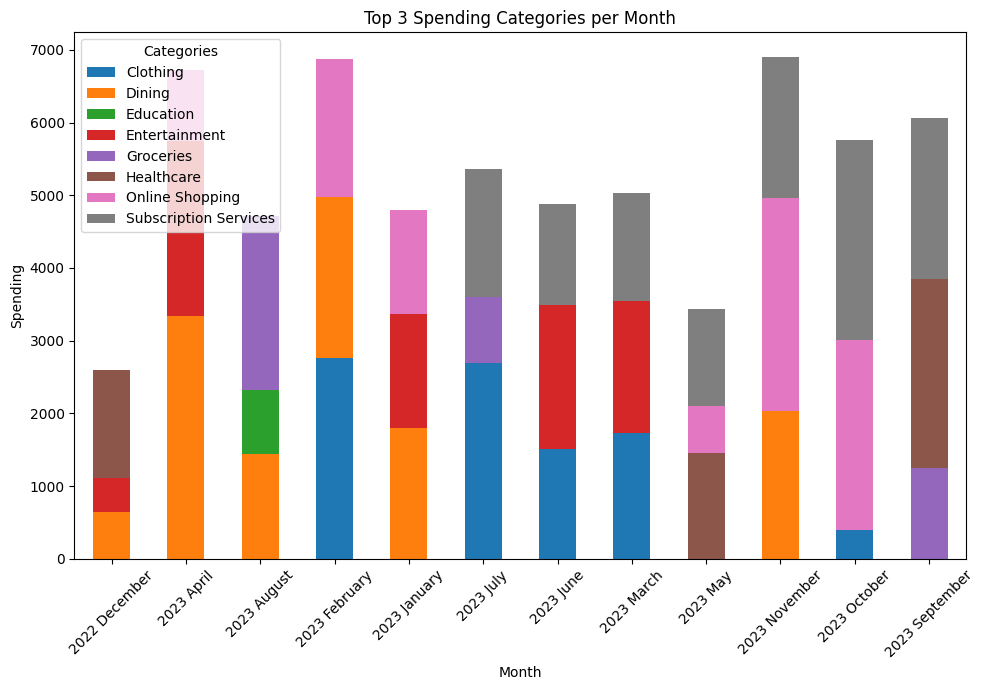

In [10]:
pivot_df = top_spendings_df.pivot(index='Month', columns='Category', values='Spending')

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Month')
plt.ylabel('Spending')
plt.title('Top 3 Spending Categories per Month')
plt.xticks(rotation=45)
plt.legend(title='Categories')

plt.tight_layout()
plt.show()

As can be seen from these tables and analyses, spendings did not remain stable over the months and constantly changed. In addition, the top 3 most spent categories remained mostly (over 50%) constant.